In [1]:
# 네이버 뉴스량과 환율의 상관관계
# (1) 일단 뉴스 데이터를 날짜별, 카테고리별로 크롤링해오기
# (2) 뉴스량과 환율을 다양하게 시각화해서 인사이트 도출해보기

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
from urllib.request import urlopen
import pandas as pd
import bs4
import requests

In [4]:
url = 'https://news.naver.com/'
html = urlopen(url)
# 파서 객체 생성
bs_obj = bs4.BeautifulSoup(html, "html.parser")

In [5]:
# (1) 섹션 메뉴와 링크를 리스트로 생성
# 빈 리스트 생성
section = []
link = []

lis = bs_obj.select('.Nlnb_menu_list li') # 링크 & 섹션 크게 추출

#하나씩 추출해서 리스트에 추가
link = [li.find('a')['href'] for li in lis] # 링크 추출
section = [li.find('a').text for li in lis] # 

In [6]:
# 수집된 데이터로 df 구성
new_section_df = pd.DataFrame({'section':section, 'link':link})
new_section_df

,section,link
0,언론사별,https://news.naver.com/?viewType=pc
1,정치,https://news.naver.com/section/100
2,경제,https://news.naver.com/section/101
3,사회,https://news.naver.com/section/102
4,생활/문화,https://news.naver.com/section/103
5,IT/과학,https://news.naver.com/section/105
6,세계,https://news.naver.com/section/104
7,랭킹,https://news.naver.com/main/ranking/popularDay...
8,신문보기,https://news.naver.com/newspaper/home?viewType=pc
9,오피니언,https://news.naver.com/opinion/home


In [7]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

In [8]:
from datetime import datetime, timedelta

In [9]:
# 해당 섹션에 대한 모든 topic 크롤링하는 함수 
def get_topic (url, section):
    # 접속 및 결과
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36"}
    
    # webdriver 객체 생성
    chrome_options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
    driver.get(url)
    driver.implicitly_wait(30)
    try:
        while True:
            if url=='https://news.naver.com/section/101':
                more_btn = driver.find_element(By.XPATH, '//*[@id="newsct"]/div[5]/div/div[2]/a')
            else:
                more_btn = driver.find_element(By.XPATH, '//*[@id="newsct"]/div[4]/div/div[2]/a')
            more_btn.click()
            time.sleep(0.5)
    except Exception as e:
        print('finish') # 6일 전 기사까지 보임
        
    now = datetime.now()
    
    # 빈 리스트 생셩 / 추출한 결과 리스트에 저장
    title_list = [_.text for _ in driver.find_elements(By.CSS_SELECTOR, 'li.sa_item._LAZY_LOADING_WRAP strong.sa_text_strong')]# 제목 리스트
    print(len(title_list))
    time_list = [_.text for _ in driver.find_elements(By.CSS_SELECTOR, 'li.sa_item._LAZY_LOADING_WRAP div.sa_text_info b')]# 시간 리스트
    print(len(time_list))
    date_list = []
    for time_str in time_list:
        if '일전' in time_str:
            days_ago = int(time_str.replace('일전', ''))
            news_date = now - timedelta(days=days_ago)
        elif '시간전' in time_str:
            times_ago = int(time_str.replace('시간전', ''))
            news_date = now - timedelta(hours=times_ago)
        else:
            news_date = now
        date_list.append(news_date.strftime("%Y-%m-%d"))

    driver.quit()
    print(len(date_list))
    # 딕셔너리로 만들어서 반환
    return {'news_title':title_list, 'section':section, 'date':date_list}

In [10]:
# 날짜 추출 함수
# def get_date(url):
#     # 접속 및 결과
#     headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36"}
#     datetime_list = []# 날짜 리스트
#     try:
#         res = requests.get(url, headers=headers)
#         html = res.text
        
#         # 파싱
#         bs_obj = bs4.BeautifulSoup(html, 'html.parser')
        
#         # 빈 리스트 생셩 / 추출한 결과 리스트에 저장
#         datetime_list.append(bs_obj.select_one('.media_end_head_info_datestamp_bunch span').text) # 날짜 추출
#     except:
#             print('오류발생')
#     # 딕셔너리로 만들어서 반환
#     return {'date_time':datetime_list}

In [20]:
# 일부 섹션에 대한 모든 topic 데이터프레임 생성
all_topic_df = pd.DataFrame(
    {'news_title':[],
     'section':[],
     'date':[],
    }
)
# 정치/경제/사회/생활문화/IT과학/세계 섹션 링크로 함수 호출
for i in range(1, 7):
    df = pd.DataFrame(get_topic(new_section_df['link'][i], new_section_df['section'][i]))
    all_topic_df = pd.concat([all_topic_df, df], axis=0, ignore_index=True)

finish


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=131.0.6778.109)
Stacktrace:
	GetHandleVerifier [0x007C3433+25059]
	(No symbol) [0x0074CE34]
	(No symbol) [0x0062BEC3]
	(No symbol) [0x0060D93B]
	(No symbol) [0x0069800F]
	(No symbol) [0x006AAE49]
	(No symbol) [0x00691C96]
	(No symbol) [0x00663FAC]
	(No symbol) [0x00664F3D]
	GetHandleVerifier [0x00AB5593+3113795]
	GetHandleVerifier [0x00ACA25A+3198986]
	GetHandleVerifier [0x00AC2A32+3168226]
	GetHandleVerifier [0x008632A0+680016]
	(No symbol) [0x0075577D]
	(No symbol) [0x00752A28]
	(No symbol) [0x00752BC5]
	(No symbol) [0x00745820]
	BaseThreadInitThunk [0x7544FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x770F809E+286]
	RtlGetAppContainerNamedObjectPath [0x770F806E+238]


In [12]:
all_topic_df

,news_title,section,date
0,"한동훈 '좌충우돌 리더십' 당 혼란 가중…""자기 생각만 앞세운다"" 불만",정치,2024-12-10
1,"[속보] 계엄 당시 특전사령관 ""尹, 두 번째 통화서 문 부수고 의원 끌어내라 지시""",정치,2024-12-10
2,野단독 '감액예산안' 사상 첫 국회 통과…내란 상설특검도 가결,정치,2024-12-10
3,尹 “빨리 문 부수고 들어가 끄집어내라” 지시했다,정치,2024-12-10
4,"김상욱 ""尹 탄핵 찬성…정치 오래 못해도 부끄럽지 않도록""[이정주의 질문하는기자]",정치,2024-12-10
...,...,...,...
32263,"""캐나다, 미국 51번째 주 돼라"" 트럼프의 살벌한 농담",세계,2024-12-04
32264,"미국 HBM 수출 막자…중국 ""갈륨·게르마늄 금수"" 바로 보복했다",세계,2024-12-04
32265,"美법원, 142조원 달하는 2018년 머스크 보상안 또 거부",세계,2024-12-04
32266,"[올댓차이나] 홍콩 증시, 中 지원정책 기대에 사흘째 상승…H주 0.9%↑",세계,2024-12-04


In [13]:
all_topic_df.to_csv('./crawl_data/naver_news_1210.csv', index=0, encoding='utf-8-sig')

In [14]:
all_topic_df = pd.read_csv('./crawl_data/naver_news_1210.csv')

In [15]:
# 환율 정보 추출
dollar_change_df = pd.DataFrame({'date':['2024-12-10', '2024-12-09', '2024-12-08', '2024-12-07', '2024-12-06', '2024-12-05',
                                    '2024-12-04'],
                                 'dollar':[1430.70, 1430.50, 1430.50, 1430.50, 1424.00, 1416.50, 1413.50]})

dollar_change_df.set_index('date', inplace=True)
dollar_change_df

,dollar
date,
2024-12-10,1430.7
2024-12-09,1430.5
2024-12-08,1430.5
2024-12-07,1430.5
2024-12-06,1424.0
2024-12-05,1416.5
2024-12-04,1413.5


In [19]:
# 뉴스 시각화 df
naver_news_df = pd.pivot_table(all_topic_df,
                               index='date',
                               columns='section',
                               observed=True,
                               aggfunc='count')
naver_news_df

news_title                             
section         IT/과학    경제    사회 생활/문화   세계    정치
date                                              
2024-12-04        271  1774  2493   241  521  1953
2024-12-05        328  1521  2046   257  381   997
2024-12-06        230  1100  1686   244  315  1005
2024-12-07        111   205   493   171  160   927
2024-12-08        165   423   808   123  205   891
2024-12-09        255  1402  2364   294  339   916
2024-12-10        219  1405  1874   200  259   696

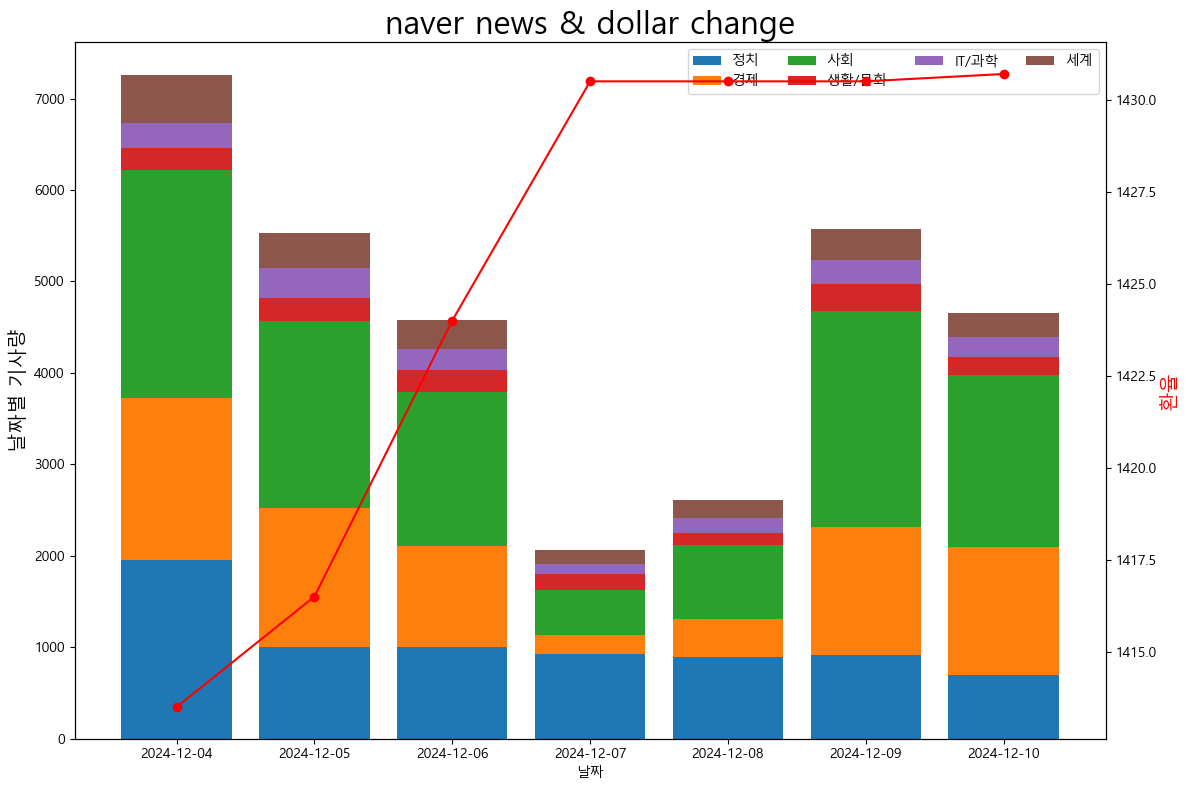

In [17]:
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트
matplotlib.rc('font', family='Malgun Gothic')

# 시각화
# 뉴스 기사량 누적그래프
fig, news = plt.subplots(figsize=(12, 8))
g = news.set_title('naver news & dollar change', fontsize=23)
g = news.set_xlabel('날짜')
g = news.set_ylabel('날짜별 기사량', fontsize=14)

# 각 columns를 누적막대그래프로 그리기
g = news.bar(naver_news_df.index, naver_news_df['news_title']['정치'], label='정치')
g = news.bar(naver_news_df.index, naver_news_df['news_title']['경제'], bottom=naver_news_df['news_title']['정치'], label='경제')
g = news.bar(naver_news_df.index, naver_news_df['news_title']['사회'], bottom=naver_news_df['news_title']['정치'] + naver_news_df['news_title']['경제'], label='사회')
g = news.bar(naver_news_df.index, naver_news_df['news_title']['생활/문화'], bottom=naver_news_df['news_title']['정치'] + naver_news_df['news_title']['경제'] + naver_news_df['news_title']['사회'], label='생활/문화')
g = news.bar(naver_news_df.index, naver_news_df['news_title']['IT/과학'], bottom=naver_news_df['news_title']['정치'] + naver_news_df['news_title']['경제'] + naver_news_df['news_title']['사회'] + naver_news_df['news_title']['생활/문화'], label='IT/과학')
g = news.bar(naver_news_df.index, naver_news_df['news_title']['세계'], bottom=naver_news_df['news_title']['정치'] + naver_news_df['news_title']['경제'] + naver_news_df['news_title']['사회'] + naver_news_df['news_title']['생활/문화'] + naver_news_df['news_title']['IT/과학'], label='세계')

g = news.legend(ncol = 4)
g = news.tick_params(axis='y')

# 환율 그래프 그리기
g = dollar = news.twinx() # 두번째 축 생성
g = dollar.set_ylabel('환율', fontsize=14, color='red')
g = dollar.plot(dollar_change_df.index, dollar_change_df['dollar'], marker='o', color='red')
g = dollar.tick_params(axis='y')

g = fig.tight_layout()# 레이아웃 조정
g = plt.show()

In [ ]:
# 기사량 감소 / 환율 3원 증가
# 기사량 감소 / 환율 7.5원 증가
# 기사량 감소 / 환율 6.5원 증가